In [1]:
import numpy as np
import py4dgeo, laspy
import pickle
from tqdm import tqdm
import os, sys
sys.path.append('../src')
import helper, classes, metric, statistic

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# _cloudcompare_param_mapping = {
#     "normalscale": "normal_radii",
#     "registrationerror": "reg_error",
#     "searchdepth": "max_distance",
#     "searchscale": "cyl_radii",
#     "usemedian": "robust_aggr",
# }

##### Create class wise point clouds 

In [3]:
synth_pc_path = '/home/Meins/Uni/TUM/SS23/Data Lab/Data Sets/Synthetic/Val_1 - Cloud.las'
real_pc_path = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/train/Train1 - labelled.las'

In [4]:
real_points_all_classes, synth_points_all_classes = helper.import_and_prepare_point_clouds(real_pc_path, synth_pc_path, shift_real=True, flip_synth=True, crop=True)
real_points_class_wise = metric.class_split_pc(real_points_all_classes, type='real')
synth_points_class_wise = metric.class_split_pc(synth_points_all_classes, type='synth')

##### M3C2

In [5]:
distances_medians, distances_all, uncertainties_all, skipped_classes = metric.m3c2_class_wise(real_points_class_wise, synth_points_class_wise)

INFO:root:	M3C2 Splitting data


TypeError: list indices must be integers or slices, not str

##### Cloud-to-Cloud

In [2]:
c2c_median_distance, c2c_mean_dist, c2c_stdev = metric.cloud_to_cloud_distance(real_points_all_classes, synth_points_all_classes)

NameError: name 'real_points_all_classes' is not defined

##### Data Set Statistics

How are datapoints distributed between training, validation, and test datasets?

In [2]:
path_train_1 = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/train/Train1 - labelled.las'
path_train_2 = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/train/train2-labeled.las'
path_valid = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/valid/validation_classified_merge_cut.las'
path_test = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/test/test-merged.las'

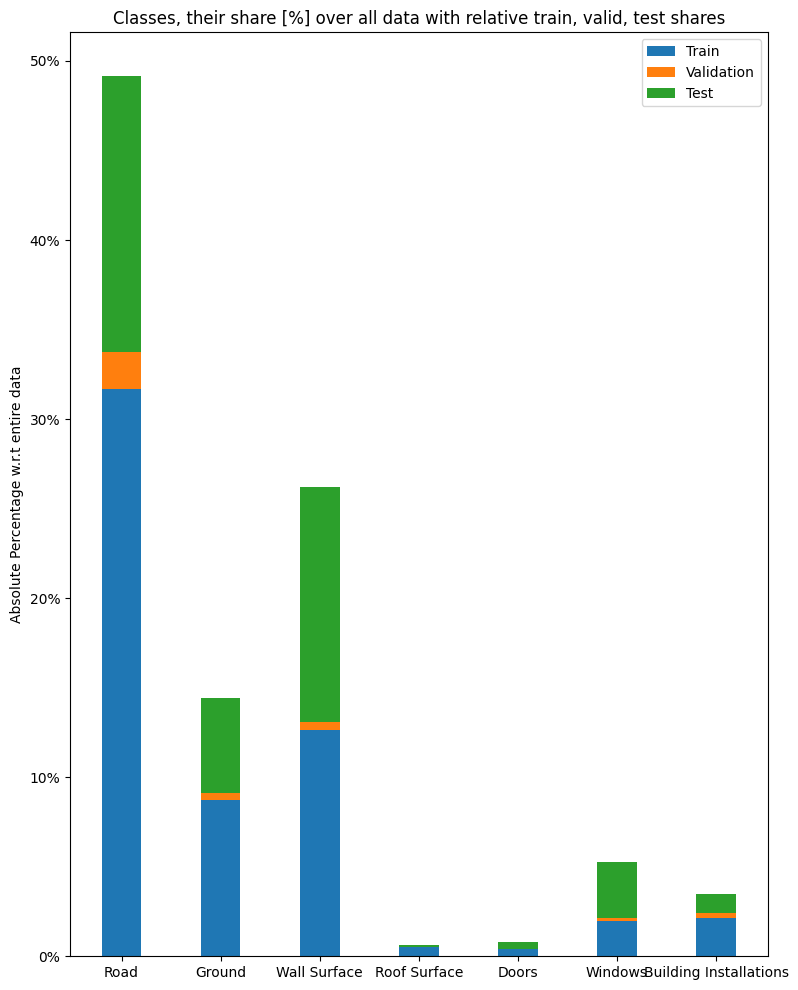

In [3]:
output = statistic.compute_data_distribution(path_train_1, path_train_2, path_valid, path_test)

In [5]:
# trying out different mIoU usages:
epsilon = 0.001
weighted_mean_iou = 1
print((1 - weighted_mean_iou))
print((1 - weighted_mean_iou) * np.exp(1-2*weighted_mean_iou))
print(1/(weighted_mean_iou+epsilon))

weighted_mean_iou = 0.1
print((1 - weighted_mean_iou))
print((1 - weighted_mean_iou) * np.exp(1-2*weighted_mean_iou))
print(1/(weighted_mean_iou+epsilon))



0
0.0
1.0
0.9
2.002986835643221
10.0


In [8]:


metric.metric_eval_functio(5, 3.2, 3)

INFO:root:scalar product = 4.0200000000000005


0.7006075426902034